In [11]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import utils.graph_utils as graph_utils
import utils.IO_utils as io_utils
import os
import importlib
from sklearn import metrics

In [12]:
# reload module
importlib.reload(graph_utils)
importlib.reload(io_utils)
#importlib.reload(plot_utils)

<module 'utils.IO_utils' from '/Users/anton/local/repos/asds/ComE/utils/IO_utils.py'>

In [13]:
input_file = "twitter"

In [14]:
# load labels
labels_true, k = io_utils.load_ground_true(file_name="twitter/twitter")

# load graph
G = graph_utils.load_csv_edges(os.path.join('./data', input_file, input_file + '.csv'), undirected=True)

In [15]:
# first compute the best partition
partition = community.best_partition(G)

partition

{542: 0,
 29: 0,
 87: 0,
 836: 1,
 640: 0,
 469: 2,
 632: 0,
 851: 0,
 551: 0,
 394: 0,
 435: 0,
 57: 0,
 166: 0,
 210: 0,
 241: 0,
 188: 0,
 1006: 0,
 801: 0,
 336: 0,
 509: 0,
 149: 0,
 746: 0,
 1032: 0,
 416: 0,
 631: 0,
 569: 0,
 72: 0,
 53: 0,
 494: 0,
 930: 0,
 955: 2,
 475: 1,
 371: 2,
 834: 0,
 399: 0,
 858: 0,
 915: 0,
 874: 0,
 817: 0,
 1023: 0,
 772: 3,
 748: 0,
 372: 1,
 859: 1,
 49: 0,
 638: 3,
 64: 0,
 960: 0,
 557: 0,
 103: 1,
 314: 0,
 1029: 3,
 1049: 0,
 25: 2,
 358: 3,
 477: 4,
 352: 0,
 736: 0,
 412: 3,
 381: 0,
 313: 0,
 238: 0,
 56: 0,
 353: 0,
 455: 0,
 934: 2,
 131: 0,
 451: 0,
 626: 0,
 1040: 0,
 264: 2,
 445: 0,
 802: 2,
 476: 2,
 611: 0,
 179: 0,
 197: 1,
 530: 0,
 549: 0,
 749: 0,
 454: 0,
 522: 0,
 267: 1,
 1026: 0,
 728: 0,
 346: 0,
 512: 2,
 81: 0,
 326: 1,
 762: 0,
 379: 2,
 710: 0,
 325: 0,
 184: 0,
 231: 0,
 599: 0,
 641: 3,
 683: 1,
 560: 1,
 284: 1,
 526: 0,
 935: 1,
 185: 1,
 873: 1,
 927: 2,
 316: 1,
 181: 1,
 659: 0,
 1041: 0,
 667: 3,
 461: 3,
 99

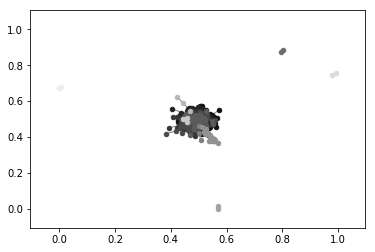

In [16]:
# drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [17]:
# labels_pred

labels_pred = [partition[key] for key in sorted(partition.keys())]

In [18]:
print("labels_true: ", labels_true)
print("labels_pred: ", labels_pred)

labels_true:  [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0

In [19]:
# NMI

metrics.normalized_mutual_info_score(labels_true, labels_pred)

0.0060474736436637345